In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter('ignore')  # Ignore all warnings

In [39]:
df = pd.read_csv('/Churn_Modelling.csv')

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [42]:
# Data Prepration
# Data Munging
# Outlier Treatment
# MVI
# Feature Engineering
# Modelling

In [43]:
# 1. Drop Unnecessary Columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [44]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

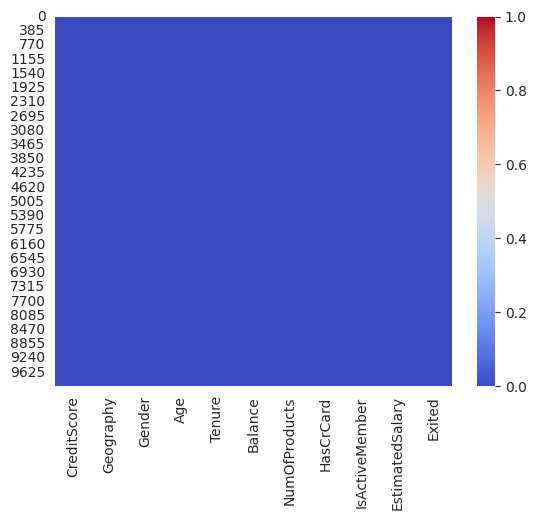

In [45]:
# Create the heatmap
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

In [46]:
from sklearn.impute import SimpleImputer
# Impute missing values for 'Geography' with the mode (most frequent value)
# Impute missing values for 'Age', 'HasCrCard', and 'IsActiveMember' with the mean
imputer = SimpleImputer(strategy='most_frequent')
df['Geography'] = imputer.fit_transform(df[['Geography']])
imputer = SimpleImputer(strategy='mean')
df[['Age', 'HasCrCard', 'IsActiveMember']] = imputer.fit_transform(df[['Age', 'HasCrCard', 'IsActiveMember']])

In [47]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

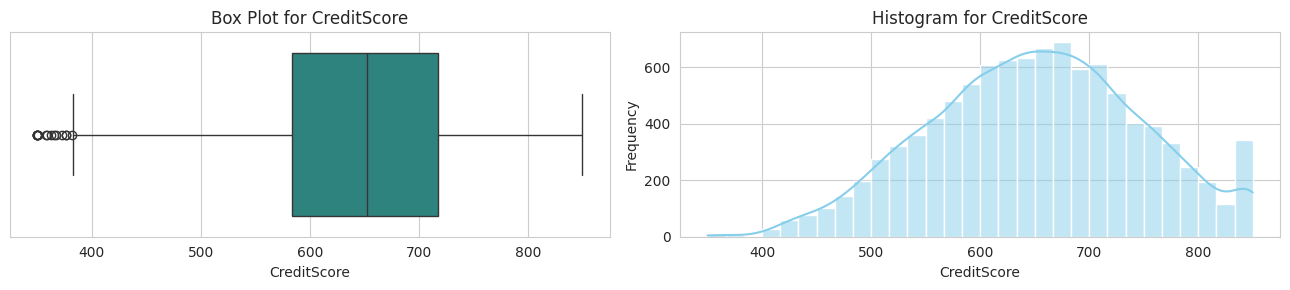

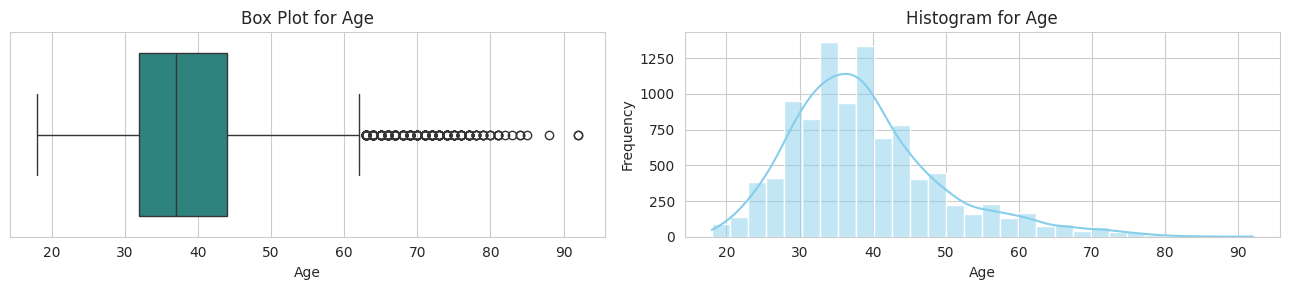

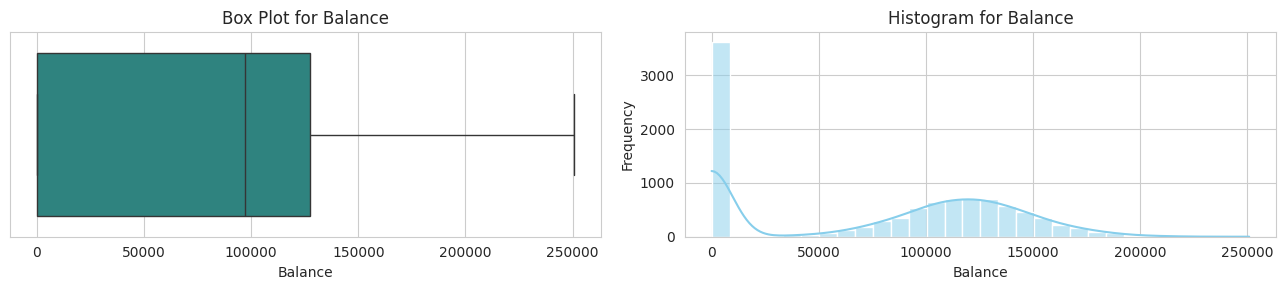

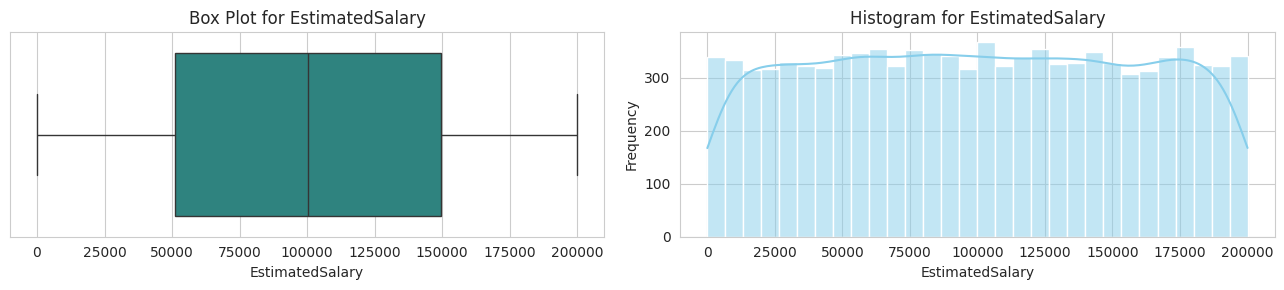

In [49]:
# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(1, 2, figsize=(13, 3))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=variable, palette='viridis')
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, kde=True, bins=30, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each numerical variable
for variable in numerical_variables:
    create_variable_plots(variable)

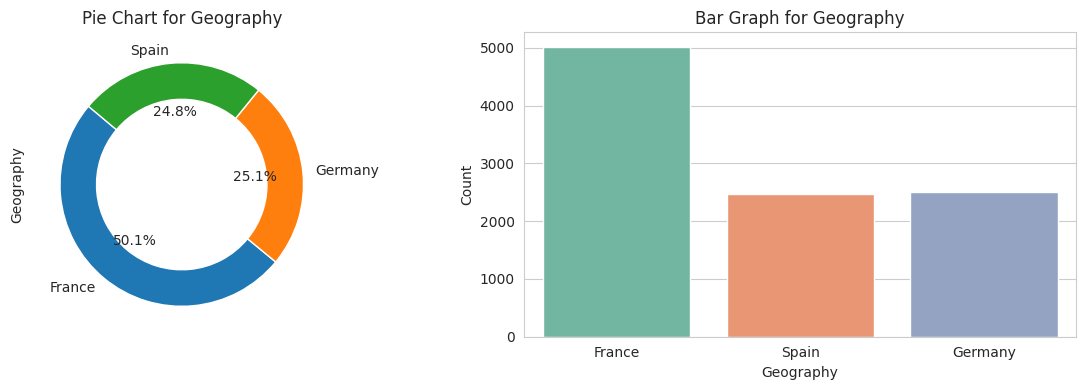

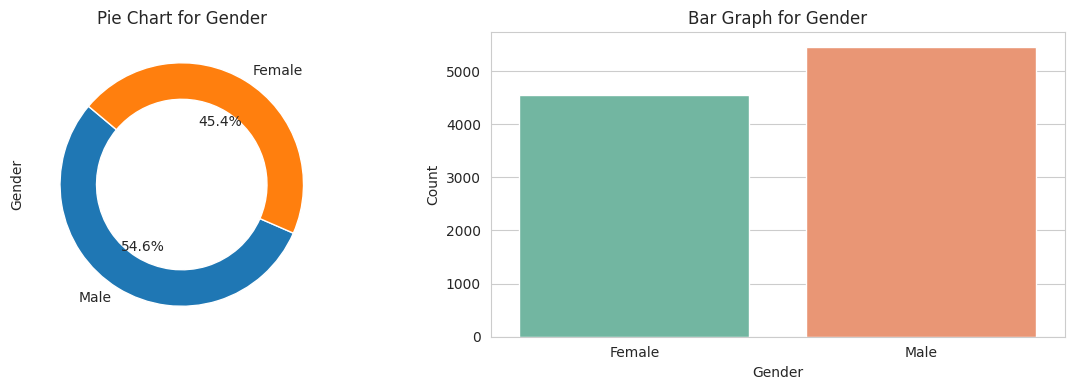

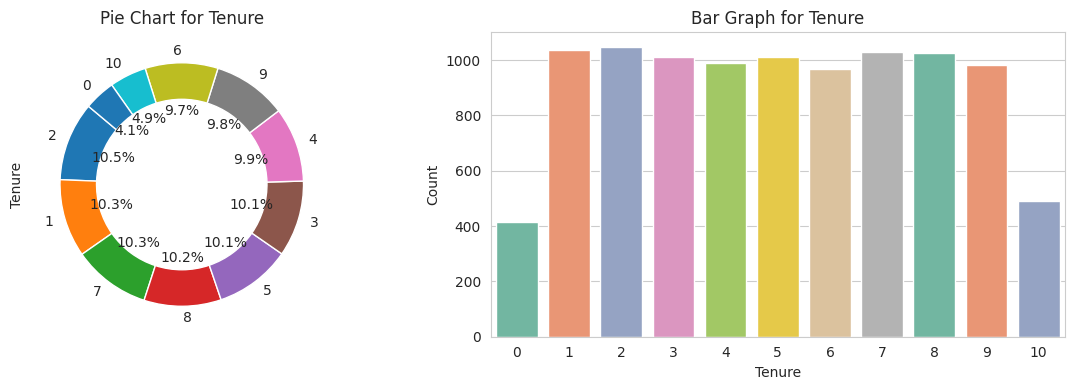

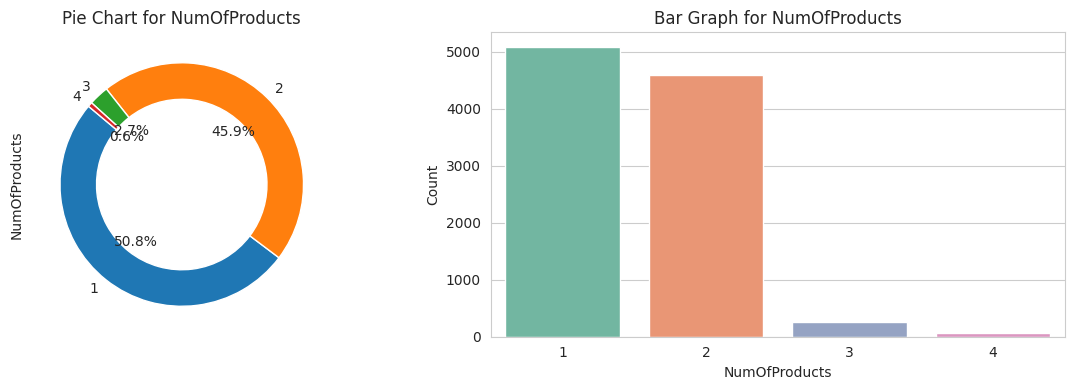

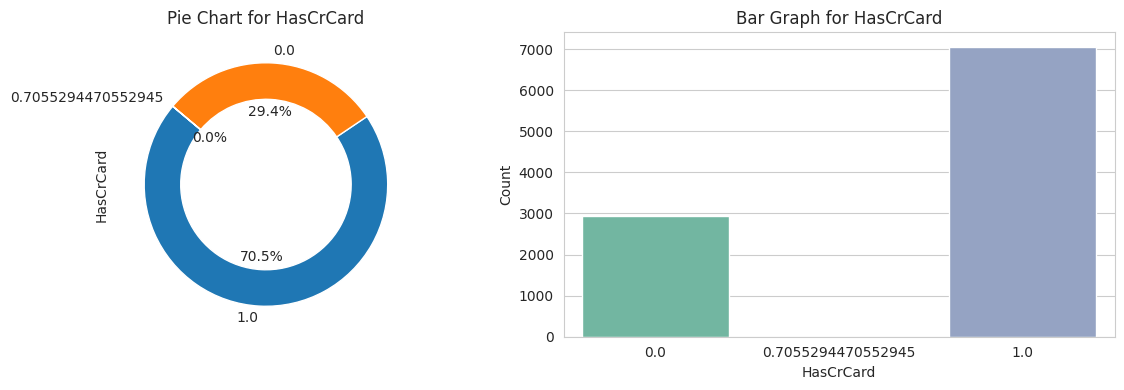

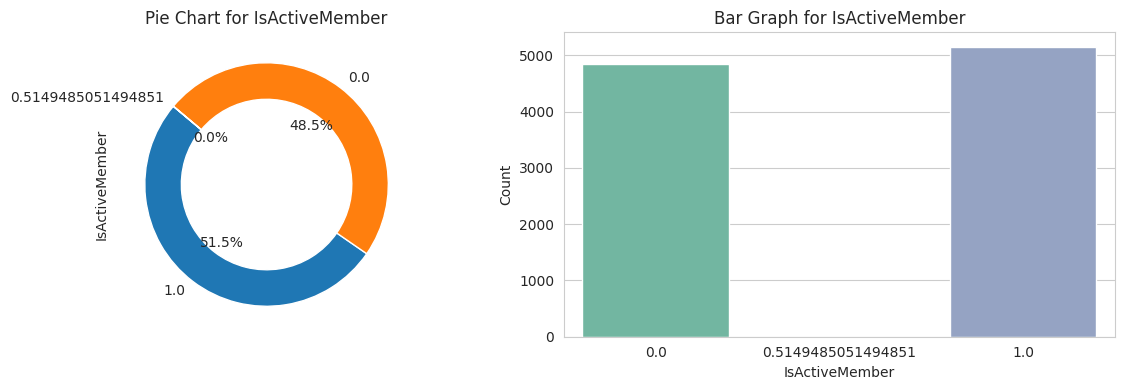

In [50]:
# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3), startangle=140)
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=variable, palette=sns.color_palette("Set2"))
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

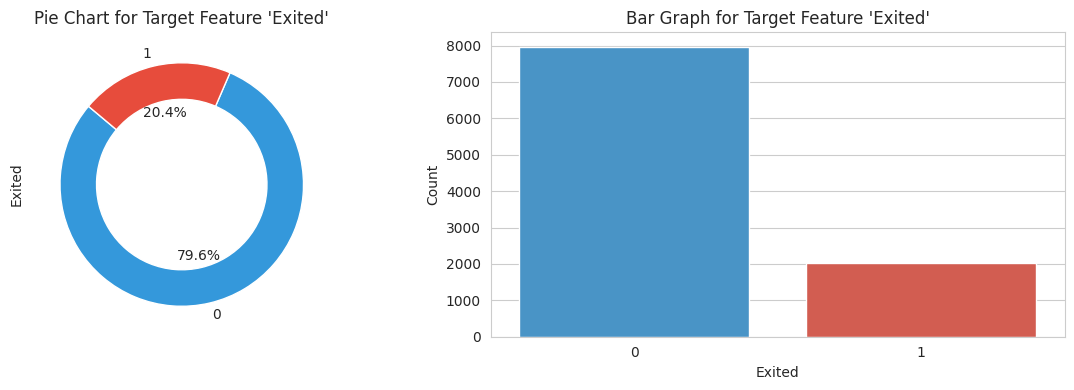

In [51]:
# Define a custom color palette for the target feature
target_palette = ['#3498db', '#e74c3c']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie Chart
plt.subplot(1, 2, 1)
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', colors=target_palette, wedgeprops=dict(width=0.3), startangle=140)
plt.title(f"Pie Chart for Target Feature '{target_variable}'")

# Bar Graph
plt.subplot(1, 2, 2)
sns.countplot(data=df, x=target_variable, palette=target_palette)
plt.xlabel(target_variable)
plt.ylabel("Count")
plt.title(f"Bar Graph for Target Feature '{target_variable}'")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

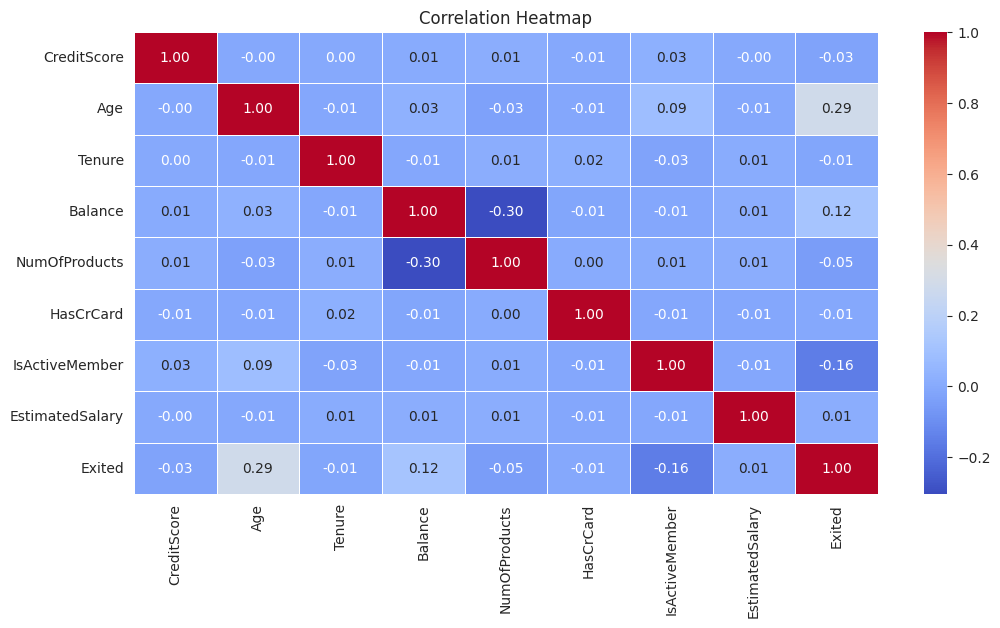

In [52]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the given correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [53]:
def perform_feature_engineering(df):
    # Age Group
    age_bins = [0, 30, 40, 50, 60, 100]  # Adjusted age bins
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=False, right=False)

    # Balance Category
    balance_bins = [-np.inf, 0, 10000, 50000, 100000, np.inf]
    df['BalanceCategory'] = pd.cut(df['Balance'], bins=balance_bins, labels=False, right=False)

    # Credit Score Category
    credit_bins = [0, 600, 700, 800, 900, np.inf]  # Adjusted credit bins
    df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=False, right=False)

    # Tenure Group
    tenure_bins = [0, 5, 10, np.inf]  # Adjusted tenure bins
    df['TenureGroup'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=False, right=False)

    # Salary to Balance Ratio
    df['SalaryToBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)  # Adding 1 to avoid division by zero

    # Credit Card and Active Member Interaction
    df['CreditCard_ActiveMember'] = df['HasCrCard'] * df['IsActiveMember']

    # ABP Interaction
    df['ABPInteraction'] = df['Age'] * df['Balance'] / (df['NumOfProducts'] + 1)  # Adding 1 to avoid division by zero

    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']

    df['TotalProductUsage'] = df['Tenure'] * df['NumOfProducts']

    df['AgeAdjustedProductUsage'] = df['NumOfProducts'] / ((df['Tenure'] + 1) * df['Age'])  # Adding 1 to avoid division by zero

    df['Customer_Status'] = df['Tenure'].apply(lambda x: 'New' if x < 2 else 'Long-term')

    return df


# Apply the function to the dataset
df = perform_feature_engineering(df)


In [54]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,Geo_Gender,TotalProductUsage,AgeAdjustedProductUsage,Customer_Status
0,619,France,Female,42.0,2,0.00,1,1.000000,1.0,101348.88,...,1,1,0,101348.880000,1.000000,0.00,France_Female,2,0.007937,Long-term
1,608,Spain,Female,41.0,1,83807.86,1,0.000000,1.0,112542.58,...,3,1,0,1.342848,0.000000,1718061.13,Spain_Female,1,0.012195,New
2,502,France,Female,42.0,8,159660.80,3,1.000000,0.0,113931.57,...,4,0,1,0.713581,0.000000,1676438.40,France_Female,24,0.007937,Long-term
3,699,France,Female,39.0,1,0.00,2,0.000000,0.0,93826.63,...,1,1,0,93826.630000,0.000000,0.00,France_Female,2,0.025641,New
4,850,Spain,Female,43.0,2,125510.82,1,0.705529,1.0,79084.10,...,4,3,0,0.630093,0.705529,2698482.63,Spain_Female,2,0.007752,Long-term


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CreditScore              10002 non-null  int64  
 1   Geography                10002 non-null  object 
 2   Gender                   10002 non-null  object 
 3   Age                      10002 non-null  float64
 4   Tenure                   10002 non-null  int64  
 5   Balance                  10002 non-null  float64
 6   NumOfProducts            10002 non-null  int64  
 7   HasCrCard                10002 non-null  float64
 8   IsActiveMember           10002 non-null  float64
 9   EstimatedSalary          10002 non-null  float64
 10  Exited                   10002 non-null  int64  
 11  AgeGroup                 10002 non-null  int64  
 12  BalanceCategory          10002 non-null  int64  
 13  CreditScoreCategory      10002 non-null  int64  
 14  TenureGroup           

In [56]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.1)
    Q3 = data[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)

    return filtered_data, rows_deleted

def remove_outliers_iqr_for_columns(data, columns_to_check):
    rows_deleted_total = 0

    for column in columns_to_check:
        data, rows_deleted = remove_outliers_iqr(data, column)
        rows_deleted_total += rows_deleted
        print(f"Rows deleted for {column}: {rows_deleted}")

    print(f"Total rows deleted: {rows_deleted_total}")

    return data


# Specify the numerical columns to check for outliers
numerical_columns_to_check = numerical_variables #df.select_dtypes(include=['int64', 'float64']).columns

# Apply the outlier removal function
df_cleaned = remove_outliers_iqr_for_columns(df, numerical_columns_to_check)


Rows deleted for CreditScore: 0
Rows deleted for Age: 0
Rows deleted for Balance: 0
Rows deleted for EstimatedSalary: 0
Total rows deleted: 0


In [57]:
# Get the index of the data to be transformed
skewed_features = df[numerical_variables].skew()[df[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
print(skewed_features)

# Apply log1p transformation to skewed features
df[skewed_features] = np.log1p(df[skewed_features])

Features to be transformed (skewness > 0.75):
['Age']


In [58]:
display(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,Geo_Gender,TotalProductUsage,AgeAdjustedProductUsage,Customer_Status
0,619,France,Female,3.761200,2,0.00,1,1.000000,1.0,101348.88,...,1,1,0,101348.880000,1.000000,0.00,France_Female,2,0.007937,Long-term
1,608,Spain,Female,3.737670,1,83807.86,1,0.000000,1.0,112542.58,...,3,1,0,1.342848,0.000000,1718061.13,Spain_Female,1,0.012195,New
2,502,France,Female,3.761200,8,159660.80,3,1.000000,0.0,113931.57,...,4,0,1,0.713581,0.000000,1676438.40,France_Female,24,0.007937,Long-term
3,699,France,Female,3.688879,1,0.00,2,0.000000,0.0,93826.63,...,1,1,0,93826.630000,0.000000,0.00,France_Female,2,0.025641,New
4,850,Spain,Female,3.784190,2,125510.82,1,0.705529,1.0,79084.10,...,4,3,0,0.630093,0.705529,2698482.63,Spain_Female,2,0.007752,Long-term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,3.610918,7,0.00,1,0.000000,1.0,42085.58,...,1,2,1,42085.580000,0.000000,0.00,France_Female,7,0.003472,Long-term
9998,772,Germany,Male,3.761200,3,75075.31,2,1.000000,0.0,92888.52,...,3,2,0,1.237255,0.000000,1051054.34,Germany_Male,6,0.011905,Long-term
9999,772,Germany,Male,3.761200,3,75075.31,2,1.000000,0.0,92888.52,...,3,2,0,1.237255,0.000000,1051054.34,Germany_Male,6,0.011905,Long-term
10000,792,France,Female,3.367296,4,130142.79,1,1.000000,0.0,38190.78,...,4,2,0,0.293451,0.000000,1821999.06,France_Female,4,0.007143,Long-term


In [59]:

# Selecting specific columns for encoding
columns_to_encode = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geo_Gender', 'Customer_Status']
df_to_encode = df[columns_to_encode]

# Dropping selected columns for scaling
df_to_scale = df.drop(columns_to_encode, axis=1)

# Use pandas get_dummies to one-hot encode specified columns in the dataset
df_encoded = pd.get_dummies(df_to_encode, columns=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geo_Gender', 'Customer_Status'], drop_first=True)


In [60]:
# Display the first few rows of the encoded DataFrame
# (df_encoded.head())

In [61]:
df_to_scale.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,TotalProductUsage,AgeAdjustedProductUsage
0,619,3.761200,2,0.00,101348.88,1,2,1,1,0,101348.880000,1.000000,0.00,2,0.007937
1,608,3.737670,1,83807.86,112542.58,0,2,3,1,0,1.342848,0.000000,1718061.13,1,0.012195
2,502,3.761200,8,159660.80,113931.57,1,2,4,0,1,0.713581,0.000000,1676438.40,24,0.007937
3,699,3.688879,1,0.00,93826.63,0,1,1,1,0,93826.630000,0.000000,0.00,2,0.025641
4,850,3.784190,2,125510.82,79084.10,0,2,4,3,0,0.630093,0.705529,2698482.63,2,0.007752


In [62]:
from sklearn.preprocessing import MinMaxScaler


# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(df_to_scale.drop(['Exited'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(df_to_scale.drop(['Exited'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=df_to_scale.drop(['Exited'], axis=1).columns)

# Concatenate datasets
df_combined = pd.concat([df_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)



In [63]:
# Display the first few rows of the combined DataFrame
(df_combined.head())

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.7055294470552945,HasCrCard_1.0,IsActiveMember_0.5149485051494851,IsActiveMember_1.0,...,EstimatedSalary,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,TotalProductUsage,AgeAdjustedProductUsage
0,0,0,0,0,0,0,0,1,0,1,...,0.506735,0.50,0.000000,0.333333,0.0,0.506763,1.000000,0.000000,0.050,0.068648
1,0,1,0,0,0,0,0,0,0,1,...,0.562709,0.50,0.666667,0.333333,0.0,0.000007,0.000000,0.252877,0.025,0.111729
2,0,0,0,0,1,0,0,1,0,0,...,0.569654,0.50,1.000000,0.000000,0.5,0.000004,0.000000,0.246751,0.600,0.068648
3,0,0,0,1,0,0,0,0,0,0,...,0.469120,0.25,0.000000,0.333333,0.0,0.469151,0.000000,0.000000,0.050,0.247754
4,0,1,0,0,0,0,1,0,0,1,...,0.395400,0.50,1.000000,1.000000,0.0,0.000003,0.705529,0.397183,0.050,0.066780


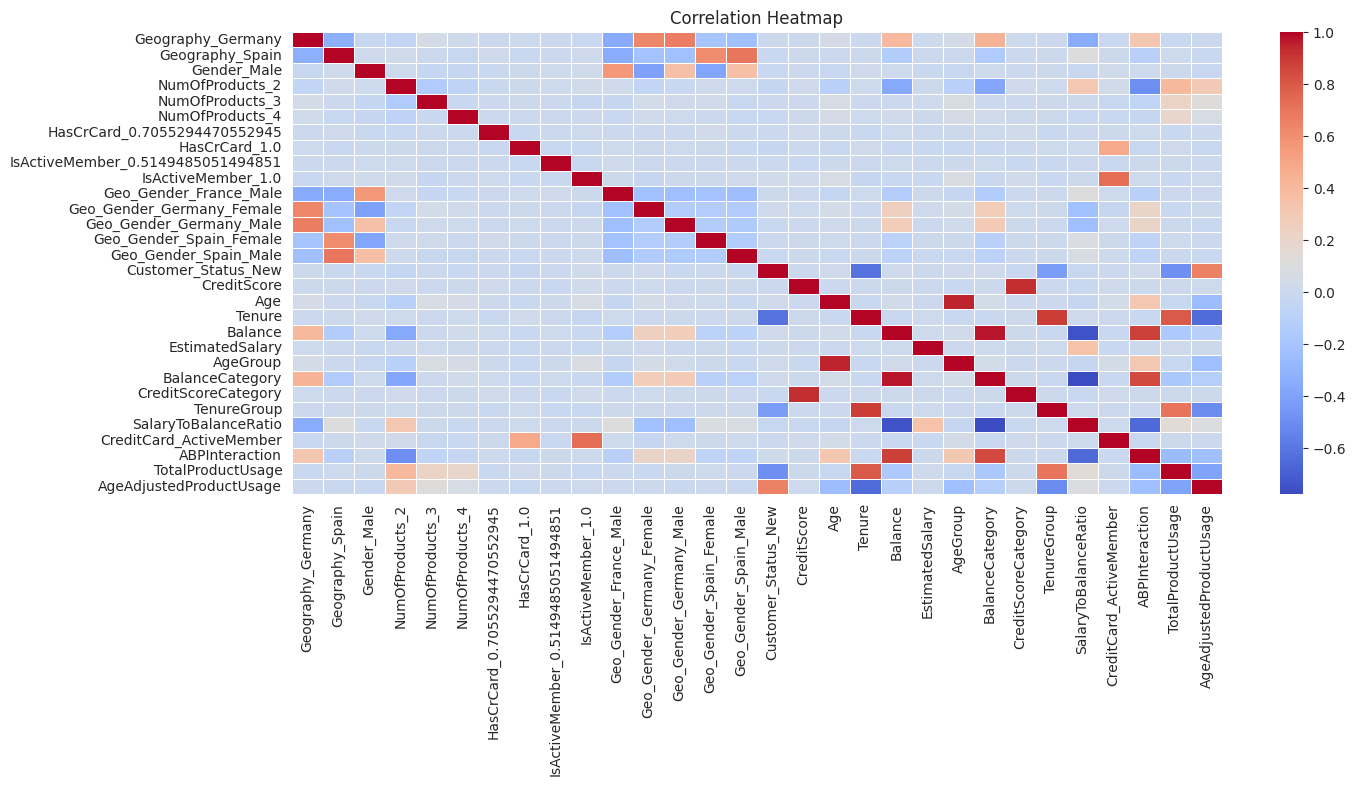

In [64]:
# Compute the correlation matrix
corr_matrix = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Create a heatmap with the given correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [65]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography_Germany                  10002 non-null  uint8  
 1   Geography_Spain                    10002 non-null  uint8  
 2   Gender_Male                        10002 non-null  uint8  
 3   NumOfProducts_2                    10002 non-null  uint8  
 4   NumOfProducts_3                    10002 non-null  uint8  
 5   NumOfProducts_4                    10002 non-null  uint8  
 6   HasCrCard_0.7055294470552945       10002 non-null  uint8  
 7   HasCrCard_1.0                      10002 non-null  uint8  
 8   IsActiveMember_0.5149485051494851  10002 non-null  uint8  
 9   IsActiveMember_1.0                 10002 non-null  uint8  
 10  Geo_Gender_France_Male             10002 non-null  uint8  
 11  Geo_Gender_Germany_Female          10002 non-null  uin

In [66]:
df_combined['Exited'] = df['Exited'].values

## Modelling

In [67]:
from sklearn.model_selection import StratifiedKFold

# Assuming you have loaded your dataset into 'df_combined' DataFrame

# Separate features (X) and target variable (y)
X = df_combined.drop('Exited', axis=1)
y = df_combined['Exited']

# Initialize StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create empty lists to store training and validation indices for each fold
train_indices = []
valid_indices = []

# Split the data into training and validation sets using k-fold cross-validation
for train_idx, valid_idx in k_fold.split(X, y):
    train_indices.append(train_idx)
    valid_indices.append(valid_idx)

# Assuming you are starting with the first fold
fold_index = 0

# Create training and validation sets for the first fold
X_train = X.iloc[train_indices[fold_index]]
y_train = y.iloc[train_indices[fold_index]]
X_valid = X.iloc[valid_indices[fold_index]]
y_valid = y.iloc[valid_indices[fold_index]]

# Display the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_valid.shape}, {y_valid.shape}")

Training set shape: (8001, 30), (8001,)
Validation set shape: (2001, 30), (2001,)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import Callback

# Create a custom callback to compute AUC-ROC during training
class AUCCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs={}):
        x_val, y_val = self.validation_data
        y_pred_val = self.model.predict(x_val)
        roc_auc = roc_auc_score(y_val, y_pred_val)
        print(f"\nAUC-ROC Score on Validation Set: {roc_auc}\n")

# Assuming you have loaded your dataset into 'df_combined' DataFrame

# Separate features (X) and target variable (y)
X = df_combined.drop('Exited', axis=1)
y = df_combined['Exited']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a simple neural network
model = Sequential()

# Add layers to the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['AUC'])  # Use accuracy as an additional metric

# Create the custom callback
auc_callback = AUCCallback(validation_data=(X_valid, y_valid))

# Train the model with the custom callback
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[auc_callback], verbose=2)


Epoch 1/10
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.810166722056054

251/251 - 2s - loss: 0.4631 - auc: 0.7091 - val_loss: 0.4001 - val_auc: 0.8103 - 2s/epoch - 8ms/step
Epoch 2/10
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.8306300235097178

251/251 - 1s - loss: 0.3882 - auc: 0.8173 - val_loss: 0.3752 - val_auc: 0.8307 - 812ms/epoch - 3ms/step
Epoch 3/10
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8369828785249189

251/251 - 1s - loss: 0.3750 - auc: 0.8294 - val_loss: 0.3735 - val_auc: 0.8368 - 817ms/epoch - 3ms/step
Epoch 4/10
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.8423848823898674

251/251 - 1s - loss: 0.3683 - auc: 0.8359 - val_loss: 0.3689 - val_auc: 0.8425 - 844ms/epoch - 3ms/step
Epoch 5/10
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8446373841438648

In [69]:
# Create a more complex neural network
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Create the custom callback
auc_callback = AUCCallback(validation_data=(X_valid, y_valid))

# Train the model with the custom callback
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[auc_callback], verbose=2)


Epoch 1/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.8333687209975013

251/251 - 2s - loss: 0.4177 - auc: 0.7805 - val_loss: 0.3828 - val_auc: 0.8334 - 2s/epoch - 8ms/step
Epoch 2/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.8372936745319597

251/251 - 1s - loss: 0.3712 - auc: 0.8337 - val_loss: 0.3735 - val_auc: 0.8373 - 897ms/epoch - 4ms/step
Epoch 3/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.8434034316802679

251/251 - 1s - loss: 0.3616 - auc: 0.8427 - val_loss: 0.3831 - val_auc: 0.8432 - 806ms/epoch - 3ms/step
Epoch 4/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.847900742217791

251/251 - 1s - loss: 0.3582 - auc: 0.8456 - val_loss: 0.3607 - val_auc: 0.8476 - 842ms/epoch - 3ms/step
Epoch 5/20
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8448574030993439

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming you have loaded your dataset into 'df_combined' DataFrame

# Separate features (X) and target variable (y)
X = df_combined.drop('Exited', axis=1)
y = df_combined['Exited']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a custom callback to compute AUC-ROC during training
class AUCCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs={}):
        x_val, y_val = self.validation_data
        y_pred_val = self.model.predict(x_val)
        roc_auc = roc_auc_score(y_val, y_pred_val)
        print(f"\nAUC-ROC Score on Validation Set: {roc_auc}\n")

# Create a more complex neural network with regularization and dropout
model = Sequential()

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with AUC as the metric
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Create the custom callback
auc_callback = AUCCallback(validation_data=(X_valid, y_valid))

# Train the model with regularization and dropout
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[auc_callback], verbose=2)

# Evaluate the final model on the test set
test_results = model.evaluate(X_test, y_test)
print(f"\nTest Set - AUC-ROC Score: {test_results[1]}")


Epoch 1/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.766737461652716

188/188 - 3s - loss: 1.1809 - auc: 0.5195 - val_loss: 0.7218 - val_auc: 0.7652 - 3s/epoch - 15ms/step
Epoch 2/20
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8037174308360749

188/188 - 1s - loss: 0.6352 - auc: 0.5695 - val_loss: 0.5245 - val_auc: 0.8023 - 738ms/epoch - 4ms/step
Epoch 3/20
63/63 [==============================] - 0s 2ms/step

AUC-ROC Score on Validation Set: 0.821437770590313

188/188 - 1s - loss: 0.5406 - auc: 0.6483 - val_loss: 0.5018 - val_auc: 0.8188 - 776ms/epoch - 4ms/step
Epoch 4/20
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8235924676602643

188/188 - 1s - loss: 0.5256 - auc: 0.6656 - val_loss: 0.4822 - val_auc: 0.8223 - 753ms/epoch - 4ms/step
Epoch 5/20
63/63 [==============================] - 0s 1ms/step

AUC-ROC Score on Validation Set: 0.8261304447745127

In [71]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras import regularizers

# Function to create the model with hyperparameter tuning
def create_model(learning_rate=0.001, dropout_rate=0.5, l1_reg=0.01):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1_reg), input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['AUC'])

    return model

# Create KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.3, 0.5, 0.7],
    'l1_reg': [0.001, 0.01, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_result.best_params_)

# Evaluate the best model on the validation set
best_model = grid_result.best_estimator_
y_pred_valid = best_model.predict(X_valid)
roc_auc_valid = roc_auc_score(y_valid, y_pred_valid)
print(f"AUC-ROC Score on Validation Set (Best Model): {roc_auc_valid}")


63/63 [==============================] - 0s 2ms/step
Best Parameters:  {'dropout_rate': 0.3, 'l1_reg': 0.001, 'learning_rate': 0.001}
63/63 [==============================] - 0s 2ms/step
AUC-ROC Score on Validation Set (Best Model): 0.6256649561734308


In [72]:
import tensorflow as tf
print(tf.__version__)

2.15.0
